In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

In [2]:
rank = pd.read_csv("../data/curated/top100.csv")
rank.head()

,rank,merchant_abn,name,tags,revenue_level,take_rate,pred_total_num_consumer,pred_total_num_transaction,pred_total_revenue,scaled_pred_total_num_consumer,scaled_pred_total_num_transaction,scaled_pred_total_revenue,score,segment
0,1.0,86578477987,Leo In Consulting,watch,a,6.43,18356.113566,186946.749066,3.992515e+07,81.846275,93.847990,97.593499,91.745679,personal & household good retail
1,2.0,45629217853,Lacus Consulting,gift,a,6.98,20191.435558,152028.388588,3.819332e+07,90.029612,76.318838,93.360191,87.248612,personal & household good retail
2,3.0,89726005175,Est Nunc Consulting,tent,a,6.01,20434.182107,148236.132238,3.587346e+07,91.111971,74.415111,87.689512,84.733930,recreational good retailing
3,4.0,49891706470,Non Vestibulum Industries,tent,a,5.80,19570.482775,169802.295225,3.046344e+07,87.260907,85.241408,74.465184,81.536768,recreational good retailing
4,5.0,21439773999,Mauris Non Institute,cable,a,6.10,22388.332445,81951.886245,3.705975e+07,99.825141,41.140163,90.589293,78.525308,technical & machinery service


In [4]:
value_count = rank['segment'].value_counts()
value_count

personal & household good retail    43
recreational good retailing         30
technical & machinery service       20
health service                       7
Name: segment, dtype: int64

In [5]:
rank['tags'].value_counts()

tent             14
computer         12
watch             9
gift              8
digital goods     7
furniture         5
artist supply     5
motor             5
books             5
opticians         5
florists          5
garden supply     4
stationery        3
shoe              3
cable             3
antique           2
music             2
health            2
hobby             1
Name: tags, dtype: int64

In [6]:
tag_lst = []
for segments in rank['segment'].unique():
    sub_lst = []
    for tags in rank.loc[rank['segment'] == segments]['tags'].unique():
        tag_lst.append(len(rank.loc[rank['tags'] == tags]))
        sub_lst.append(tags)
    print(segments, ": ", sub_lst)
tag_lst


personal & household good retail :  ['watch', 'gift', 'music', 'florists', 'artist supply', 'furniture', 'antique', 'garden supply', 'shoe']
recreational good retailing :  ['tent', 'digital goods', 'hobby', 'books', 'stationery']
technical & machinery service :  ['cable', 'computer', 'motor']
health service :  ['opticians', 'health']


[9, 8, 2, 5, 5, 5, 2, 4, 3, 14, 7, 1, 5, 3, 3, 12, 5, 5, 2]

In [7]:
cmap1 = plt.colormaps['Blues']
inner_colors1 = cmap1(np.arange(9)*30 + 100)
cmap2 = plt.colormaps['Oranges']
inner_colors2 = cmap2(np.arange(5)*30 + 100)
cmap3 = plt.colormaps['Greens']
inner_colors3 = cmap3(np.arange(3)*30 + 100)
cmap4 = plt.colormaps['Purples']
inner_colors4 = cmap4(np.arange(2)*30 + 100)

inner_colors = np.vstack((inner_colors1, inner_colors2, inner_colors3, inner_colors4))

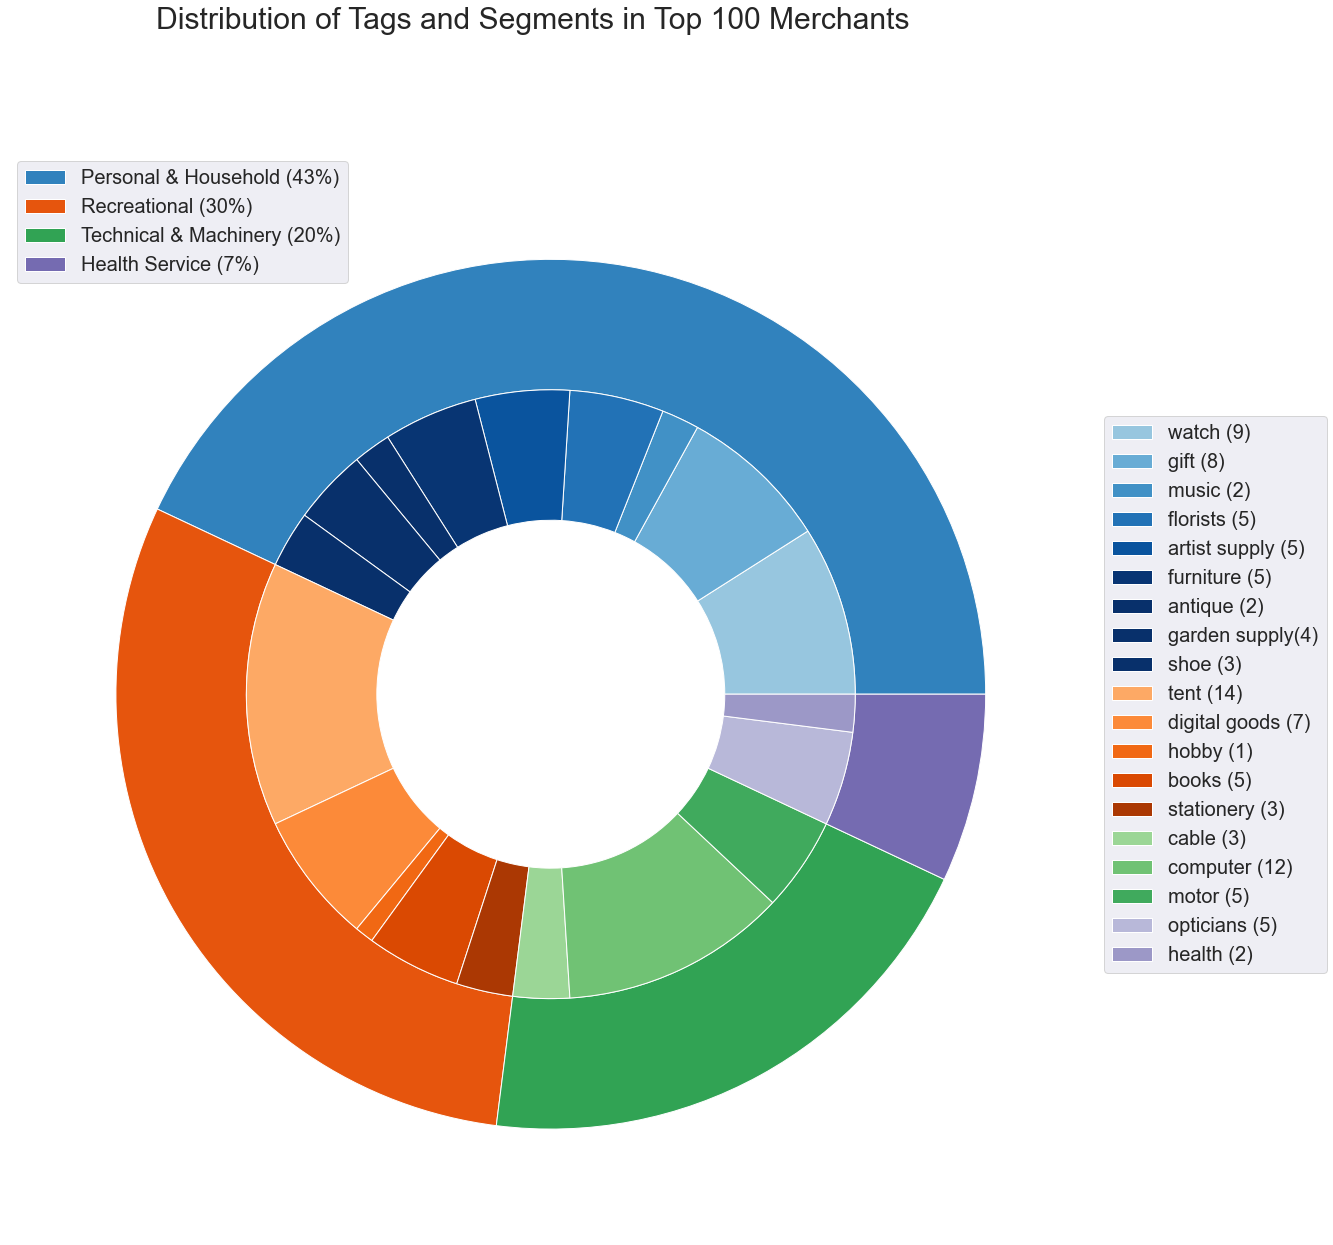

In [24]:
fig, ax = plt.subplots(figsize = (20, 20))
size = 0.3

[9, 8, 2, 5, 5, 5, 2, 4, 3, 14, 7, 1, 5, 3, 3, 12, 5, 5, 2]
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)

labels1 = [r'Personal & Household (43%)', r'Recreational (30%)', r'Technical & Machinery (20%)', r'Health Service (7%)']
size1 = [43, 30, 20, 7]
patches1, texts1= ax.pie(size1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
legend1 = plt.legend(patches1, labels1, loc = 'upper left', prop={'size': 20})

labels2 = [r'watch (9)', r'gift (8)', r'music (2)', r'florists (5)', r'artist supply (5)', r'furniture (5)', 
        r'antique (2)', r'garden supply(4)', r'shoe (3)', r'tent (14)', r'digital goods (7)', r'hobby (1)',\
        r'books (5)', r'stationery (3)', r'cable (3)', r'computer (12)', r'motor (5)', r'opticians (5)', r'health (2)']
size2 = tag_lst
patches2, texts2= ax.pie(size2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.legend(patches2, labels2, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
plt.gca().add_artist(legend1)

ax.set(aspect="equal")
fig.suptitle('Distribution of Tags and Segments in Top 100 Merchants', fontsize=30)
plt.savefig("../plots/Tag and Segments Distribution in TOP100.png", bbox_inches = 'tight')
plt.show()

In [16]:
top_two = rank.loc[(rank['tags'] == 'tent') | (rank['tags'] == 'computer')]

<AxesSubplot: xlabel='rank', ylabel='pred_total_revenue'>

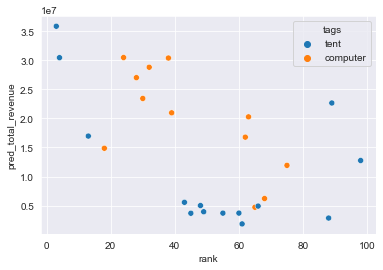

In [17]:
sns.scatterplot(y=top_two['pred_total_revenue'], x=top_two['rank'], hue=top_two['tags'])
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted total revenue", fontsize=12)
plt.show()

<AxesSubplot: xlabel='rank', ylabel='pred_total_num_consumer'>

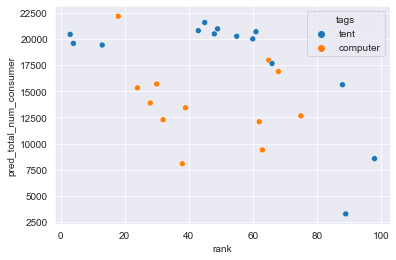

In [18]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_consumer', data = top_two, hue = 'tags')
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted number of consumers", fontsize=12)
plt.show()

<AxesSubplot: xlabel='rank', ylabel='pred_total_num_transaction'>

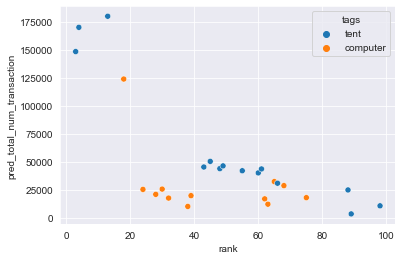

In [19]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_transaction', data = top_two, hue = 'tags')
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted number of transactions", fontsize=12)
plt.show()